In [1]:
import numpy as np
from matplotlib import pylab as plt
import sklearn as sk
from sklearn import pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

In [2]:
#Task 0

dataset = load_breast_cancer() # load all the data

data = np.concatenate( (dataset.data,dataset.target[:,np.newaxis]), axis =1)
names = dataset.feature_names
names = np.append(names,'diagnosis')
print(names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'
 'diagnosis']


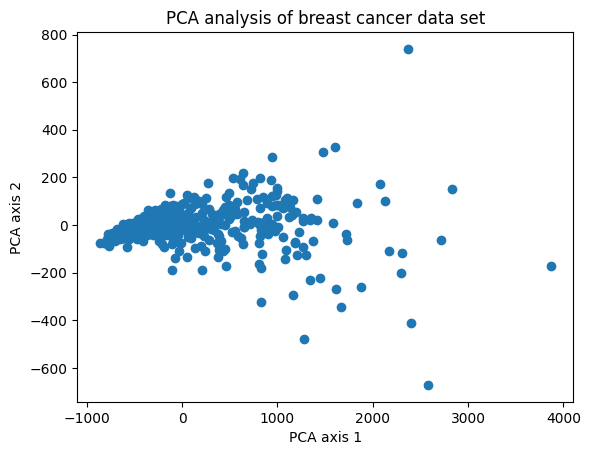

In [3]:
#Task 1

pca_data = PCA(n_components=2).fit_transform(data[:,:-1]);
plt.scatter(pca_data[:,0],pca_data[:,1]);
plt.xlabel("PCA axis 1");
plt.ylabel("PCA axis 2");
plt.title("PCA analysis of breast cancer data set");
plt.show();

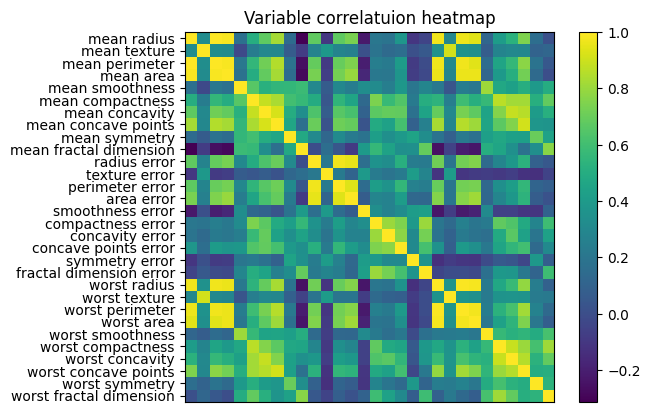

In [4]:
#Task 2

corr_mat = np.corrcoef(data[:,:-1], rowvar=False)

plt.imshow(corr_mat);
plt.xticks([],[]);
plt.yticks(range(30),names[:-1]);
plt.title("Variable correlatuion heatmap");
plt.colorbar();

plt.show();

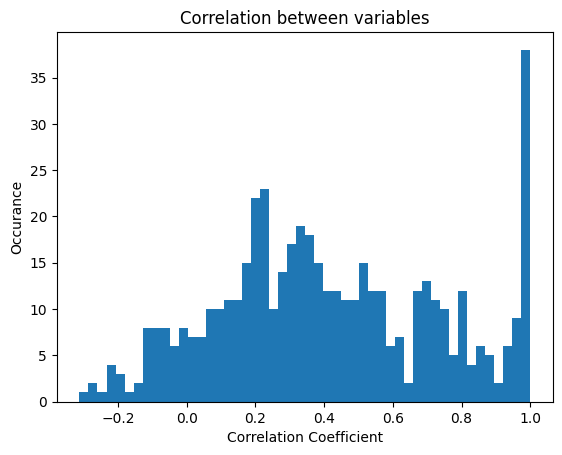

In [5]:
#Task 2 cont.

freqs = np.tril(corr_mat,k=1).flatten()
freqs = freqs[freqs!=0]

plt.hist(freqs, bins=50);
plt.title("Correlation between variables");
plt.xlabel("Correlation Coefficient");
plt.ylabel("Occurance");

plt.show();

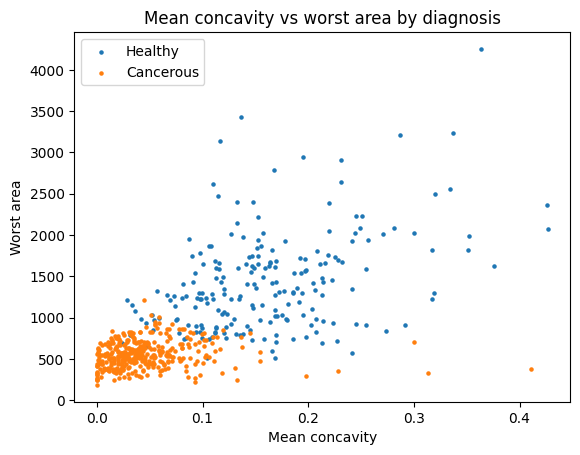

In [6]:
#Task 3

x0 = data[data[:,-1]==0,names=='mean concavity']
y0 = data[data[:,-1]==0,names=='worst area']

x1 = data[data[:,-1]==1,names=='mean concavity']
y1 = data[data[:,-1]==1,names=='worst area']

dot_size=5
plt.scatter(x0,y0,dot_size)
plt.scatter(x1,y1,dot_size)
plt.legend(['Healthy','Cancerous']);
plt.title('Mean concavity vs worst area by diagnosis');
plt.ylabel('Worst area');
plt.xlabel('Mean concavity');

plt.show();

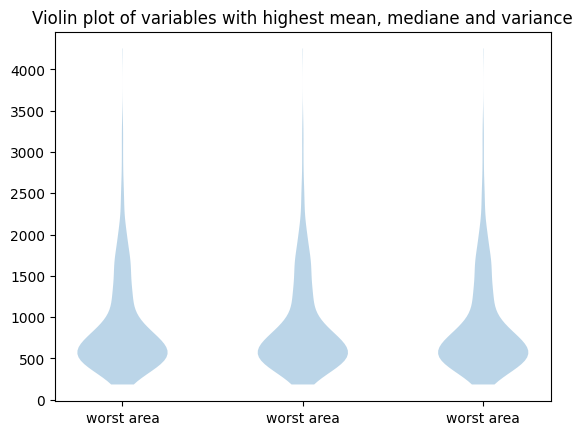

In [7]:
#Task 4

i_maxmean = np.argmax(np.mean(data[:,:-1],axis=0))
i_maxmedian = np.argmax(np.median(data[:,:-1],axis=0))
i_maxvar = np.argmax(np.var(data[:,:-1],axis=0))
i_mat=np.array([i_maxmean,i_maxmedian,i_maxvar])

plt.violinplot(data[:,i_mat], showextrema=False);
plt.xticks(range(1,4),names[i_mat]);

plt.title('Violin plot of variables with highest mean, mediane and variance');

plt.show();

Naturally, the variable with highest mean also has highest median and variance. We can get a more interesting plot by taking meadian/mean and stardard-deviation/mean instead and plotting the normalized distribution.

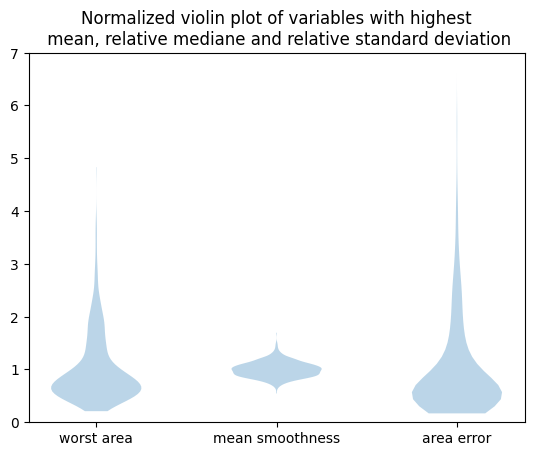

In [8]:
#Task 4 cont.

means = np.mean(data[:,:-1],axis=0)

i_maxmean = np.argmax(means)
i_maxmedian = np.argmax(np.divide(np.median(data[:,:-1],axis=0),means))
i_maxvar = np.argmax(np.divide(np.std(data[:,:-1],axis=0),means))
i_mat=np.array([i_maxmean,i_maxmedian,i_maxvar])

violinplot_data = data[:,i_mat]/np.mean(data[:,i_mat],axis=0)
plt.violinplot(violinplot_data,showextrema=False);
plt.ylim([0,7]);
plt.xticks(range(1,4),names[i_mat]);

plt.title('Normalized violin plot of variables with highest\n mean, relative mediane and relative standard deviation');

plt.show();

In [9]:
#Task 5

np.random.seed(1)

traindata,testdata = sk.model_selection.train_test_split(data)
model1 = sk.linear_model.LogisticRegression(max_iter=100000).fit(traindata[:,:-1], traindata[:,-1])
prediction = model1.predict(testdata[:,:-1])

performance = sum(prediction == testdata[:,-1])/prediction.size
performance = round(performance*100,2)

print("Out of sample performance accuracy is "+str(performance)+"%. The simple model took "+str(model1.n_iter_[0])+" iterations.")



Out of sample performance accuracy is 94.41%. The simple model took 2521 iterations.


In [10]:
#Task 6

model2 = sk.pipeline.make_pipeline(sk.preprocessing.StandardScaler(),model1);
model2.fit(traindata[:,:-1], traindata[:,-1]);

prediction = model2.predict(testdata[:,:-1])
performance = sum(prediction == testdata[:,-1])/prediction.size 
performance = round(performance*100,2)

print("Out of sample performance accuracy is "+str(performance)+"%. The pipeline model took "+str(model2[1].n_iter_[0])+" iterations.")

Out of sample performance accuracy is 97.9%. The pipeline model took 31 iterations.


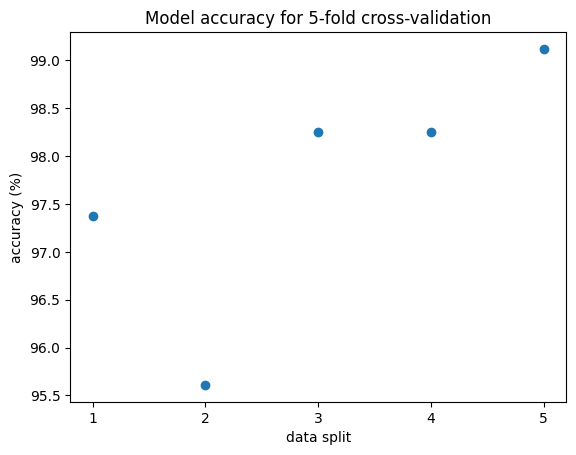

Average accuracy for 5-fold cross-validation is 97.72%.


In [11]:
#Task 7

kf = sk.model_selection.KFold(n_splits=5, shuffle=False)\

accuracies = np.zeros(5)

for i,(train_index, test_index) in enumerate(kf.split(data)):

    traindata = data[train_index]
    testdata = data[test_index]

    model2.fit(traindata[:,:-1], traindata[:,-1]);

    prediction = model2.predict(testdata[:,:-1])
    performance = sum(prediction == testdata[:,-1])/prediction.size 
    performance = round(performance*100,2)

    accuracies[i] = performance


plt.scatter(range(1,6),accuracies);
plt.xticks(range(1,6));
plt.ylabel("accuracy (%)");
plt.xlabel("data split");
plt.title("Model accuracy for 5-fold cross-validation");

plt.show();

performance = np.mean(accuracies)
performance = round(performance,2)
print("Average accuracy for 5-fold cross-validation is "+str(performance)+"%.")

In [12]:
#task 8

loo = sk.model_selection.LeaveOneOut()
loo_size = data.shape[0]

accuracies = np.zeros(loo_size)

for i,(train_index, test_index) in enumerate(loo.split(data)):

    traindata = data[train_index]
    testdata = data[test_index]

    model2.fit(traindata[:,:-1], traindata[:,-1]);

    prediction = model2.predict(testdata[:,:-1])
    performance = sum(prediction == testdata[:,-1])/prediction.size 
    performance = round(performance*100,2)

    accuracies[i] = performance

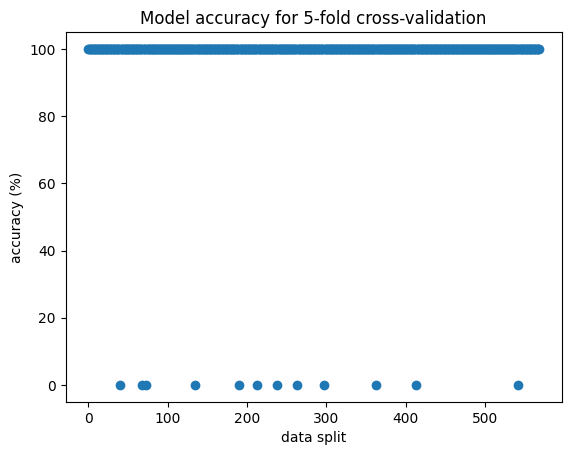

Performance accuracy for leave one out cross validation is 97.89%.


In [13]:
plt.scatter(range(0,loo_size),accuracies);
plt.xticks(range(0,loo_size,100));
plt.ylabel("accuracy (%)");
plt.xlabel("data split");
plt.title("Model accuracy for 5-fold cross-validation");

plt.show();

performance = np.mean(accuracies)
performance = round(performance,2)
print("Performance accuracy for leave one out cross validation is "+str(performance)+"%.")
